In [33]:
#Librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from scipy import stats
#import ipinfo as ifi


In [34]:
#Ubicación de archivo / dataframe
# guardar datos despues de limpieza datos.to_csv('ubicación')
nombre_columnas=['fecha_transaccion','monto','titular_de_cuenta','numero_de_tarjeta','nombre_comerciante','codigo_categoria_del_comerciante','ubicación_de_transaccion','moneda_de_transaccion','tipo de tarjeta','fecha_vencimiento_de_tarjeta','codigo_CVV','codigo_respuesta_de_transaccion','id_de_transaccion','etiqueta_de_fraude','transacciones_previas','fuente_de_transaccion','direccion_IP','informacion_del_dispositivo','informacion_de_la_cuenta_de_usuario','notas_de_transaccion']
datos= pd.read_csv('credit_card_fraud.csv',names=nombre_columnas,header=0)
datos.head()

FileNotFoundError: [Errno 2] No such file or directory: 'archive/credit_card_fraud.csv'

In [ ]:
#formato de fechas
datos.fecha_transaccion = pd.to_datetime(datos.fecha_transaccion, format="%Y-%m-%d %H:%M:%S")
datos.fecha_vencimiento_de_tarjeta = pd.to_datetime(datos.fecha_vencimiento_de_tarjeta, format="%m/%y")
#tranforma datos categoricos 
datos.codigo_categoria_del_comerciante = datos.codigo_categoria_del_comerciante.astype('str')
datos.codigo_respuesta_de_transaccion = datos.codigo_respuesta_de_transaccion.astype('str')
datos.etiqueta_de_fraude = datos.etiqueta_de_fraude.astype('str')
datos.head()

,fecha_transaccion,monto,titular_de_cuenta,numero_de_tarjeta,nombre_comerciante,codigo_categoria_del_comerciante,ubicación_de_transaccion,moneda_de_transaccion,tipo de tarjeta,fecha_vencimiento_de_tarjeta,codigo_CVV,codigo_respuesta_de_transaccion,id_de_transaccion,etiqueta_de_fraude,transacciones_previas,fuente_de_transaccion,direccion_IP,informacion_del_dispositivo,informacion_de_la_cuenta_de_usuario,notas_de_transaccion
0,2022-09-24 13:54:27,285.88,Shray Soman,daca51bffe0fc4eaaa7c430917f94b75fd893712492254...,"Rajagopalan, Ghose and Kant",3590,Khammam,INR,MasterCard,2029-04-01,01299ac65733b5a3d774265fbfe8396b8611e5e3321855...,5,b7f69cbc-a03d-41f8-adca-75920b0242c3,1,NaN,Online,18.106.240.6,Tablet,NaN,Consequatur corporis minima ad vero deserunt n...
1,2020-07-24 11:20:13,1777.32,Lakshit Bakshi,d5366dd9be3a0266c0252baceaa6332210ed4dbd0ef252...,Sule PLC,7277,Vasai-Virar,EUR,American Express,2026-03-01,ad8fa913d25b3970c6efa8ca504da8ba670ce2a9cf012d...,12,ad53cc8e-8412-422e-8cad-4176daac8387,1,NaN,Online,212.48.185.128,Mobile,jloyal,Dolore repellendus odio deleniti. Eaque quibus...
2,2023-03-18 01:05:36,3939.01,Riya Bobal,4737a6384aa1c3c31f7768b86633d6a8401dd6ab4a8ff1...,Badal PLC,9297,Nangloi Jat,USD,Visa,2029-11-01,eb3be230bbd2844b1f5d8f2e4fab9ffba8ab22cfeeb69c...,5,f09cecd6-0d74-4551-8089-a31d64e6b9c5,1,3 or more,In-Person,17.190.112.46,Mobile,NaN,Unde beatae perspiciatis sapiente. Voluptates ...
3,2021-01-07 21:53:04,376.44,Mohanlal Balakrishnan,4721806eed8f2663bb597ff13e79a294de318358fbb54b...,Konda-Sodhi,5686,Ramagundam,USD,Visa,2025-09-01,891d46993a36d78392247c642138cede01d9841daab1d9...,5,b208ae0b-4c4f-428f-b6b9-5360b288b947,0,2,In-Person,153.136.24.104,Tablet,NaN,Cupiditate repellendus necessitatibus quo occa...
4,2021-12-16 06:22:24,1687.33,Mannat Rout,9deacc3a9efd6e382826d400620aca5f23ed94327578e5...,Dua Ltd,2940,Adoni,INR,MasterCard,2031-03-01,48a1a756f2d83f1dc57bbf14052b70a6f40d0fceed6662...,5,6b4e4e43-5b73-4906-9973-299a1b2a5e71,1,2,Online,196.153.28.131,Desktop,NaN,Molestias assumenda consectetur itaque veritat...


In [ ]:
#Caracteristicas basicas del dataframe
print(datos.shape)
datos.info()

(8000, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   fecha_transaccion                    8000 non-null   datetime64[ns]
 1   monto                                8000 non-null   float64       
 2   titular_de_cuenta                    8000 non-null   object        
 3   numero_de_tarjeta                    8000 non-null   object        
 4   nombre_comerciante                   8000 non-null   object        
 5   codigo_categoria_del_comerciante     8000 non-null   object        
 6   ubicación_de_transaccion             8000 non-null   object        
 7   moneda_de_transaccion                8000 non-null   object        
 8   tipo de tarjeta                      8000 non-null   object        
 9   fecha_vencimiento_de_tarjeta         8000 non-null   datetime64[ns]
 10  c

In [ ]:
# datos repetidas
print(f'Tamaño del dataset antes de eliminar las filas repetidas:{datos.shape}')
datos.drop_duplicates(inplace=True)
print(f'Tamaño del dataset después de eliminar las filas repetidas:{datos.shape}')
#no hay filas repetidas

Tamaño del dataset antes de eliminar las filas repetidas:(8000, 20)
Tamaño del dataset después de eliminar las filas repetidas:(8000, 20)


In [ ]:
#Pordentaje de datos faltantes
datos.isnull().sum()

fecha_transaccion                         0
monto                                     0
titular_de_cuenta                         0
numero_de_tarjeta                         0
nombre_comerciante                        0
codigo_categoria_del_comerciante          0
ubicación_de_transaccion                  0
moneda_de_transaccion                     0
tipo de tarjeta                           0
fecha_vencimiento_de_tarjeta              0
codigo_CVV                                0
codigo_respuesta_de_transaccion           0
id_de_transaccion                         0
etiqueta_de_fraude                        0
transacciones_previas                  2043
fuente_de_transaccion                     0
direccion_IP                              0
informacion_del_dispositivo               0
informacion_de_la_cuenta_de_usuario    4010
notas_de_transaccion                      0
dtype: int64

In [ ]:
# subniveles o categorias por columna

categorias = datos.drop("etiqueta_de_fraude", axis=1).nunique().sort_values(ascending=False)
categorias.to_frame(name='Cantidad de valores únicos')

,Cantidad de valores únicos
fecha_transaccion,8000
id_de_transaccion,8000
direccion_IP,8000
notas_de_transaccion,8000
numero_de_tarjeta,8000
monto,7934
titular_de_cuenta,7651
nombre_comerciante,7027
codigo_categoria_del_comerciante,5328
informacion_de_la_cuenta_de_usuario,3918


In [ ]:
datos['transacciones_previas'].value_counts()
datos['transacciones_previas'].fillna(0, inplace=True)
datos['transacciones_previas'].value_counts()

transacciones_previas
0            2043
1            2031
3 or more    1968
2            1958
Name: count, dtype: int64

In [ ]:
#Quitar columnas
datos.drop(['informacion_de_la_cuenta_de_usuario','codigo_CVV','numero_de_tarjeta','notas_de_transaccion'], axis=1, inplace=True)
datos.shape


(8000, 15)

In [ ]:
print(datos['codigo_respuesta_de_transaccion'].unique())
#le cambio los datos a invalido, exitoso, declinado o  lo dejo como str o en formato numero?
datos['respuesta_transaccion']=datos['codigo_respuesta_de_transaccion'].apply(lambda x: 'Invalido' if x=='12' else ('Exitoso' if x=='0' else ('Declinado' if x=='5' else x)))
datos['respuesta_transaccion'].value_counts()

['5' '12' '0']


respuesta_transaccion
Exitoso      2697
Invalido     2655
Declinado    2648
Name: count, dtype: int64

In [ ]:
datos[['monto']].describe() #un corchete dataframe dos corchetes una serie

,monto
count,8000.000000
mean,2496.356036
std,1451.221326
min,1.090000
25%,1242.580000
50%,2492.460000
75%,3739.522500
max,4996.700000


In [ ]:
z = np.abs(stats.zscore(datos['monto']))

# Identificar los valores atípicos (outliers)
threshold = 3 #umbral
outliers = datos[z > threshold]
print(outliers)

datos_filtrados = datos[z <= threshold]
datos_filtrados


Empty DataFrame
Columns: [fecha_transaccion, monto, titular_de_cuenta, numero_de_tarjeta, nombre_comerciante, codigo_categoria_del_comerciante, ubicación_de_transaccion, moneda_de_transaccion, tipo de tarjeta, fecha_vencimiento_de_tarjeta, codigo_CVV, codigo_respuesta_de_transaccion, id_de_transaccion, etiqueta_de_fraude, transacciones_previas, fuente_de_transaccion, direccion_IP, informacion_del_dispositivo, informacion_de_la_cuenta_de_usuario, notas_de_transaccion, respuesta_transaccion]
Index: []

[0 rows x 21 columns]


,fecha_transaccion,monto,titular_de_cuenta,numero_de_tarjeta,nombre_comerciante,codigo_categoria_del_comerciante,ubicación_de_transaccion,moneda_de_transaccion,tipo de tarjeta,fecha_vencimiento_de_tarjeta,...,codigo_respuesta_de_transaccion,id_de_transaccion,etiqueta_de_fraude,transacciones_previas,fuente_de_transaccion,direccion_IP,informacion_del_dispositivo,informacion_de_la_cuenta_de_usuario,notas_de_transaccion,respuesta_transaccion
0,2022-09-24 13:54:27,285.88,Shray Soman,daca51bffe0fc4eaaa7c430917f94b75fd893712492254...,"Rajagopalan, Ghose and Kant",3590,Khammam,INR,MasterCard,2029-04-01,...,5,b7f69cbc-a03d-41f8-adca-75920b0242c3,1,0,Online,18.106.240.6,Tablet,NaN,Consequatur corporis minima ad vero deserunt n...,Declinado
1,2020-07-24 11:20:13,1777.32,Lakshit Bakshi,d5366dd9be3a0266c0252baceaa6332210ed4dbd0ef252...,Sule PLC,7277,Vasai-Virar,EUR,American Express,2026-03-01,...,12,ad53cc8e-8412-422e-8cad-4176daac8387,1,0,Online,212.48.185.128,Mobile,jloyal,Dolore repellendus odio deleniti. Eaque quibus...,Invalido
2,2023-03-18 01:05:36,3939.01,Riya Bobal,4737a6384aa1c3c31f7768b86633d6a8401dd6ab4a8ff1...,Badal PLC,9297,Nangloi Jat,USD,Visa,2029-11-01,...,5,f09cecd6-0d74-4551-8089-a31d64e6b9c5,1,3 or more,In-Person,17.190.112.46,Mobile,NaN,Unde beatae perspiciatis sapiente. Voluptates ...,Declinado
3,2021-01-07 21:53:04,376.44,Mohanlal Balakrishnan,4721806eed8f2663bb597ff13e79a294de318358fbb54b...,Konda-Sodhi,5686,Ramagundam,USD,Visa,2025-09-01,...,5,b208ae0b-4c4f-428f-b6b9-5360b288b947,0,2,In-Person,153.136.24.104,Tablet,NaN,Cupiditate repellendus necessitatibus quo occa...,Declinado
4,2021-12-16 06:22:24,1687.33,Mannat Rout,9deacc3a9efd6e382826d400620aca5f23ed94327578e5...,Dua Ltd,2940,Adoni,INR,MasterCard,2031-03-01,...,5,6b4e4e43-5b73-4906-9973-299a1b2a5e71,1,2,Online,196.153.28.131,Desktop,NaN,Molestias assumenda consectetur itaque veritat...,Declinado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,2020-12-17 20:36:48,2214.15,Lakshay Khatri,8a0015c8601fe597e160c31a05fd5e4a87a4b876df426f...,Manda Ltd,1236,Anantapuram,EUR,Visa,2026-04-01,...,5,0d219c55-87cf-43af-a1bb-cda408710de1,0,1,Online,214.34.176.247,Mobile,madhavshah,Et maiores quaerat fugiat voluptatibus reprehe...,Declinado
7996,2022-07-04 05:19:11,675.97,Dharmajan Salvi,de3530e65ccf6fc0c0eb7f7a7e8e5b71bb907d5207d390...,Bhavsar Group,3406,Guntakal,INR,Visa,2025-11-01,...,0,054f6d58-9925-4c49-9f5d-01b6bf3db5c8,1,3 or more,In-Person,34.237.199.33,Tablet,NaN,Assumenda maxime provident rem quis consequunt...,Exitoso
7997,2022-08-14 19:14:45,918.28,Alia Sane,227356d19fd5374e9cfdd134387fe3499683a1c7929981...,"Gole, Yohannan and Singhal",7504,Udupi,USD,MasterCard,2024-05-01,...,5,4178f63e-459b-40e6-8db6-a6ff2d6348e5,1,3 or more,In-Person,220.203.140.160,Tablet,suhanavala,Voluptatibus odit praesentium iste libero ipsa...,Declinado
7998,2021-05-16 18:21:52,3035.31,Chirag Rege,669bd9fcc7e40cc25d99c773678e48bcb3fdadf7fee6a9...,Kakar LLC,4015,Sultan Pur Majra,EUR,American Express,2024-09-01,...,0,2424f724-8bd2-4dd0-8b39-e824999a9764,1,1,In-Person,216.56.133.227,Tablet,sumeriyengar,Animi excepturi nam distinctio fuga. Vel eius ...,Exitoso


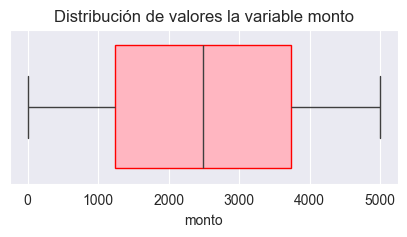

In [ ]:
#Valores aberrantes
#columnas_numericas=['monto']
sns.set_style("darkgrid")
fig, ax = plt.subplots(1, 1, figsize=(5, 2))
sns.boxplot(x=datos['monto'],boxprops=dict(facecolor='lightpink', edgecolor='red'))
plt.title('Distribución de valores la variable monto')
plt.show()
fig.tight_layout()


In [ ]:
#Agregando más filas xd
#datos['fecha_de_transaccion_año'] = datos.fecha_transaccion.dt.year
#datos['fecha_de_transaccion_mes'] = datos.fecha_transaccion.dt.month
#datos['fecha_de_transaccion_dia'] = datos.fecha_transaccion.dt.day
datos['fecha_de_transaccion_dia_de_la_semana'] = datos.fecha_transaccion.dt.day_of_week #esta si
#datos['fecha_de_transaccion_hora'] = datos.fecha_transaccion.dt.hour


C:\Users\ediso\AppData\Local\Temp\ipykernel_19944\3115213358.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='codigo_respuesta_descriptivo', data=datos, order=conteo_ordenado.index, palette='viridis')


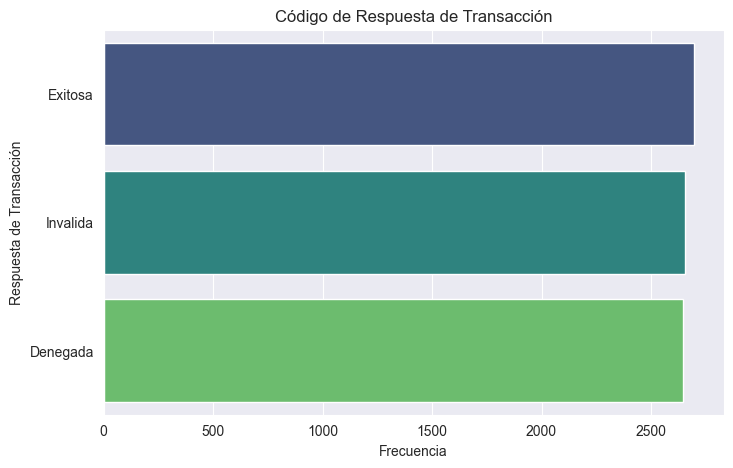

In [ ]:
#codigo de respuesta de transaccion
#0 para trasaccion aprobada
#5 transacción declinada
#This is a hard decline on the transaction, and merchants should ask customers to try a different payment method
#12 Invalid transaction - declined
#The card issuer does not allow the type of payment on a specific account. Be sure that your system is configured properly if you see this response. 
# Mapear los valores numéricos a etiquetas descriptivas
# Mapeo de respuestas
mapeo_respuestas = {'0': 'Exitosa', '5': 'Denegada', '12': 'Invalida'}
datos['codigo_respuesta_descriptivo'] = datos['codigo_respuesta_de_transaccion'].map(mapeo_respuestas)
conteo_ordenado = datos['codigo_respuesta_descriptivo'].value_counts().sort_values(ascending=False)
sns.set_style("darkgrid")
plt.figure(figsize=(8, 5))
sns.countplot(y='codigo_respuesta_descriptivo', data=datos, order=conteo_ordenado.index, palette='viridis')
plt.title('Código de Respuesta de Transacción')
plt.xlabel('Frecuencia')
plt.ylabel('Respuesta de Transacción')

plt.show()
fig.tight_layout()

In [ ]:
df_dib = datos_filtrados.groupby(["respuesta_transaccion"]).aggregate({"monto": "count"}).reset_index().sort_values("monto", ascending=False)
df_dib

,respuesta_transaccion,monto
1,Exitoso,2697
2,Invalido,2655
0,Declinado,2648


C:\Users\ediso\AppData\Local\Temp\ipykernel_19944\2312686940.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="respuesta_transaccion", x="monto", data=df_dib, palette='viridis')


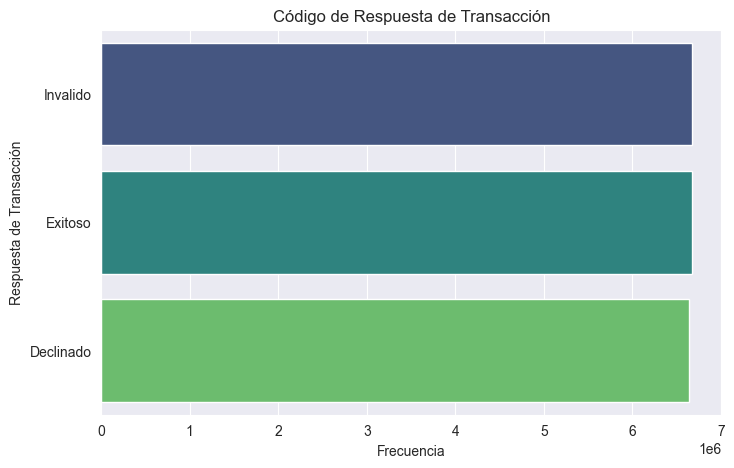

In [ ]:
#codigo de respuesta de transaccion
#0 para trasaccion aprobada
#5 transacción declinada
#This is a hard decline on the transaction, and merchants should ask customers to try a different payment method
#12 Invalid transaction - declined
#The card issuer does not allow the type of payment on a specific account. Be sure that your system is configured properly if you see this response. 
# Mapear los valores numéricos a etiquetas descriptivas
# Mapeo de respuestas


sns.set_style("darkgrid")
plt.figure(figsize=(8, 5))
sns.barplot(y="respuesta_transaccion", x="monto", data=df_dib, palette='viridis')
plt.title('Código de Respuesta de Transacción')
plt.xlabel('Frecuencia')
plt.ylabel('Respuesta de Transacción')

plt.show()
fig.tight_layout()

C:\Users\ediso\AppData\Local\Temp\ipykernel_19944\2430738005.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=conteo_ordenado.index, x=conteo_ordenado, palette='viridis')
C:\Users\ediso\AppData\Local\Temp\ipykernel_19944\2430738005.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=conteo_ordenado.index, x=conteo_ordenado, palette='viridis')


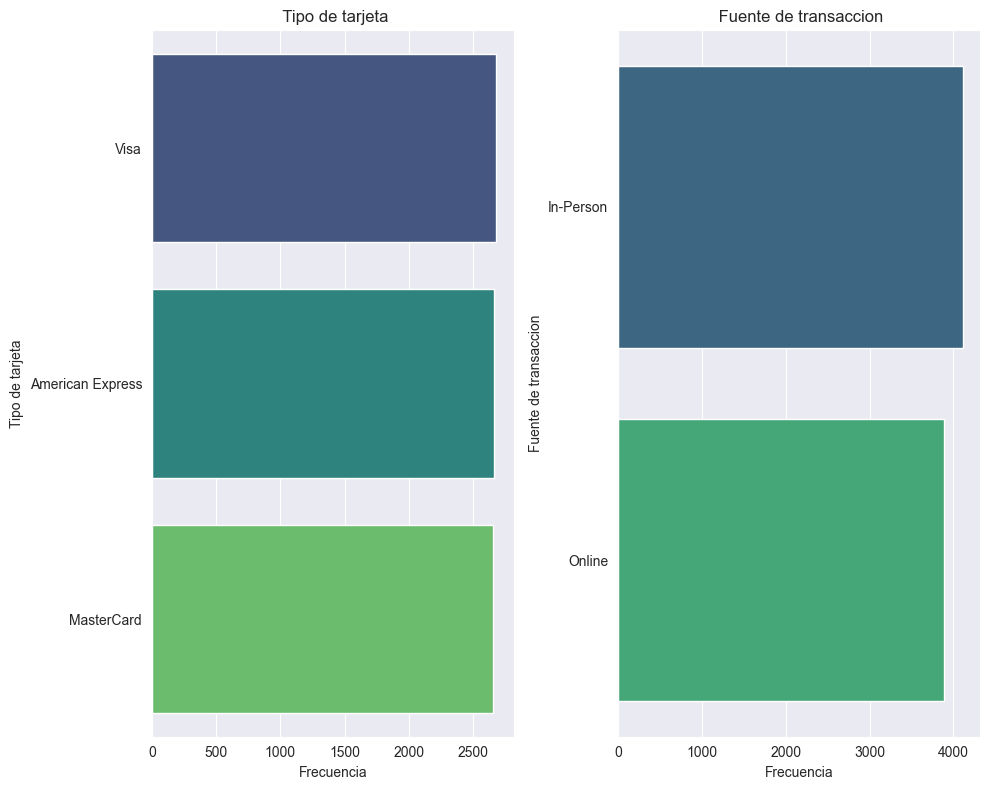

In [ ]:


# Seleccionar las variables categóricas
columnas_categoricas = ['tipo de tarjeta', 'fuente_de_transaccion']

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 8))

# Crear gráficos de barras horizontales para cada variable categórica
for i, columna in enumerate(columnas_categoricas, 1):
    plt.subplot(1, 2, i)
    conteo_ordenado = datos[columna].value_counts().sort_values(ascending=False)
    sns.barplot(y=conteo_ordenado.index, x=conteo_ordenado, palette='viridis')
    plt.title(f' {columna.capitalize().replace("_", " ")}')
    plt.xlabel('Frecuencia')
    columna_nom = columna.replace("_", " ").capitalize()
    plt.ylabel(columna_nom)

plt.tight_layout()
plt.show()


C:\Users\ediso\AppData\Local\Temp\ipykernel_19944\18444482.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="tipo de tarjeta", x="monto", data=df_tipo_tarjeta, palette='viridis', ax=axs[0])
C:\Users\ediso\AppData\Local\Temp\ipykernel_19944\18444482.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="fuente_de_transaccion", x="monto", data=df_fuente_transaccion, palette='viridis', ax=axs[1])


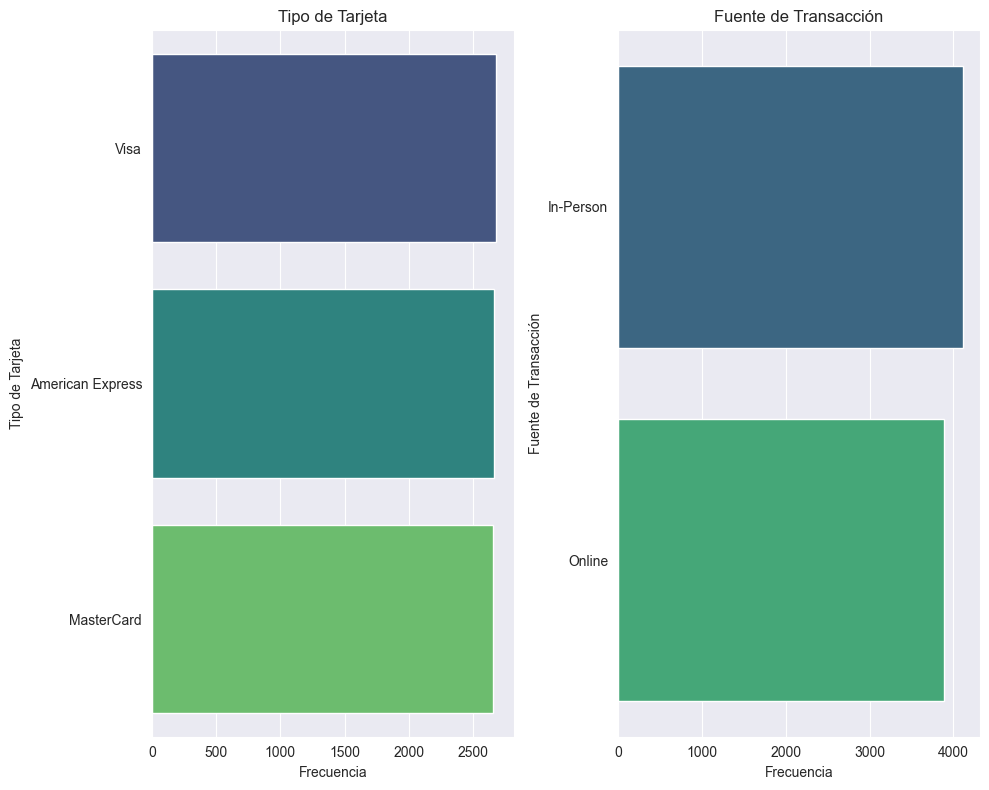

In [ ]:

df_tipo_tarjeta = datos.groupby(["tipo de tarjeta"]).aggregate({"monto": "count"}).reset_index().sort_values("monto", ascending=False)
df_fuente_transaccion = datos.groupby(["fuente_de_transaccion"]).aggregate({"monto": "count"}).reset_index().sort_values("monto", ascending=False)

fig, axs = plt.subplots(1, 2, figsize=(10, 8))

sns.barplot(y="tipo de tarjeta", x="monto", data=df_tipo_tarjeta, palette='viridis', ax=axs[0])
axs[0].set_title('Tipo de Tarjeta')
axs[0].set_xlabel('Frecuencia')
axs[0].set_ylabel('Tipo de Tarjeta')

sns.barplot(y="fuente_de_transaccion", x="monto", data=df_fuente_transaccion, palette='viridis', ax=axs[1])
axs[1].set_title('Fuente de Transacción')
axs[1].set_xlabel('Frecuencia')
axs[1].set_ylabel('Fuente de Transacción')

plt.tight_layout()
plt.show()


C:\Users\ediso\AppData\Local\Temp\ipykernel_19944\2421914887.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=conteo_ordenado.index, x=conteo_ordenado, palette='viridis')
C:\Users\ediso\AppData\Local\Temp\ipykernel_19944\2421914887.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=conteo_ordenado.index, x=conteo_ordenado, palette='viridis')


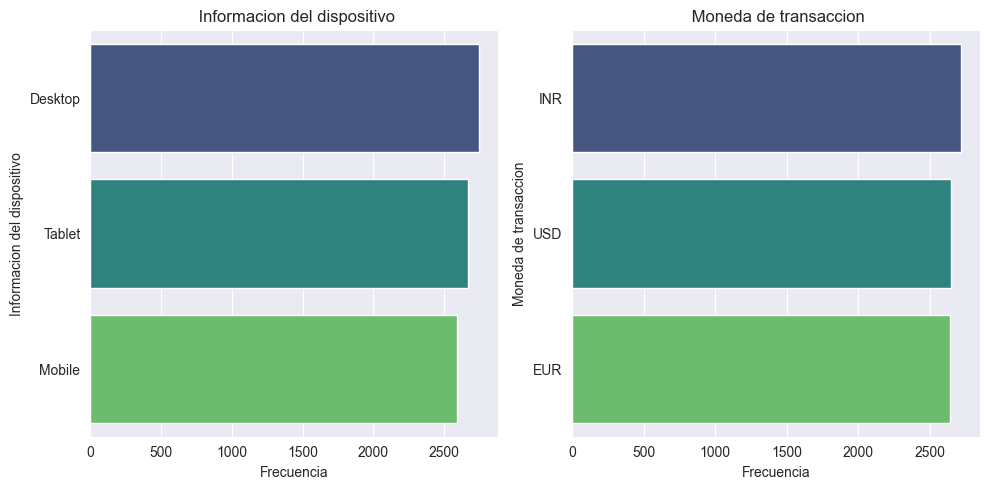

In [ ]:

# Seleccionar las variables categóricas
columnas_categoricas = ['informacion_del_dispositivo', 'moneda_de_transaccion',]

# Configurar el tamaño del gráfico
sns.set_style("darkgrid")
plt.figure(figsize=(10, 5))

# Crear gráficos de barras horizontales para cada variable categórica
for i, columna in enumerate(columnas_categoricas, 1):
    plt.subplot(1, 2, i)
    conteo_ordenado = datos[columna].value_counts().sort_values(ascending=False)
    sns.barplot(y=conteo_ordenado.index, x=conteo_ordenado, palette='viridis')
    plt.title(f' {columna.capitalize().replace("_", " ")}')
    plt.xlabel('Frecuencia')
    columna_nom = columna.replace("_", " ").capitalize()
    plt.ylabel(columna_nom)

plt.tight_layout()
plt.show()

C:\Users\ediso\AppData\Local\Temp\ipykernel_19944\3427105399.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='etiqueta_de_fraude', y='monto', data=datos, palette='viridis')


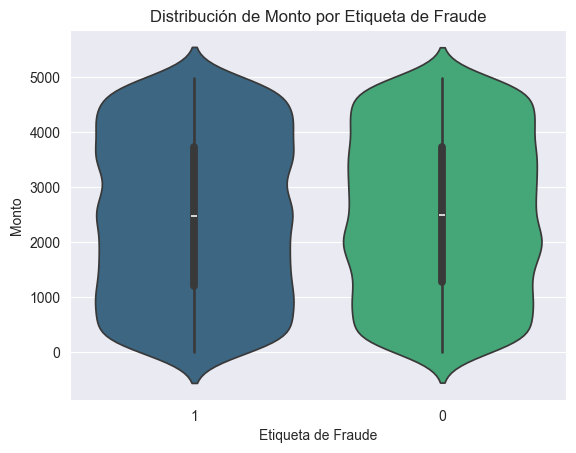

In [ ]:

'''Cuerpo del Violín (o Relleno):

El cuerpo del violín muestra la densidad de la distribución de la variable numérica. La parte más ancha del cuerpo indica una mayor densidad de datos.
Cajas (o Cajas de Violín):

A veces, se incluyen cajas (como en un diagrama de caja) dentro del violín. Estas cajas representan la mediana y los cuartiles de los datos.
Extremos del Violín (o Túneles):

Los extremos del violín (o túneles) pueden mostrarse como líneas o como la extensión de la densidad de datos más allá de los cuartiles.
Puntos Individuales (o Puntos de Datos):

Algunos gráficos de violín también incluyen puntos individuales que representan los datos reales.'''
sns.set_style("darkgrid")
sns.violinplot(x='etiqueta_de_fraude', y='monto', data=datos, palette='viridis')
plt.title('Distribución de Monto por Etiqueta de Fraude')
plt.xlabel('Etiqueta de Fraude')
plt.ylabel('Monto')
plt.show()

C:\Users\ediso\AppData\Local\Temp\ipykernel_19944\3053315167.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='etiqueta_de_fraude', data=datos, order=conteo_ordenado.index, palette='viridis')


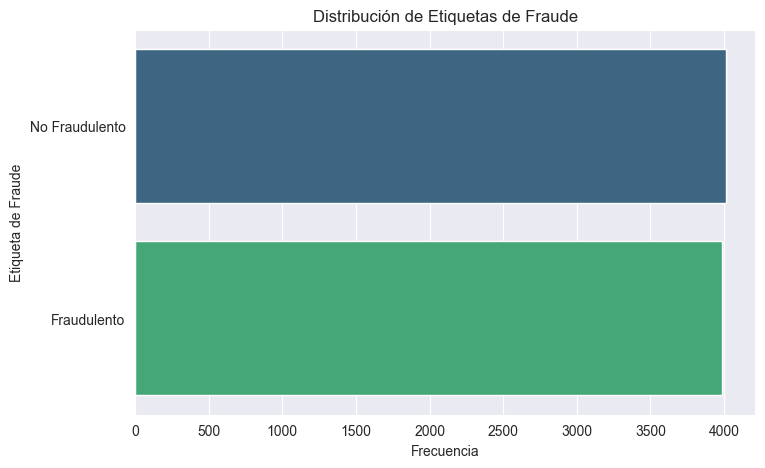

In [ ]:
conteo_ordenado = datos['etiqueta_de_fraude'].value_counts().sort_values(ascending=False)
sns.set_style("darkgrid")
plt.figure(figsize=(8, 5))
sns.countplot(y='etiqueta_de_fraude', data=datos, order=conteo_ordenado.index, palette='viridis')

plt.title('Distribución de Etiquetas de Fraude')
plt.xlabel('Frecuencia')
plt.ylabel('Etiqueta de Fraude')
plt.yticks([0, 1], ['No Fraudulento', 'Fraudulento'])
plt.show()

In [ ]:

# todos_los_meses = pd.period_range(start=datos_copia['año_mes_transaccion'].min(), end=datos_copia['año_mes_transaccion'].max(), freq='M')

# conteo_por_mes = conteo_por_mes.reindex(todos_los_meses, fill_value=0)
# sns.set_style("darkgrid")
# plt.figure(figsize=(10, 6))

# conteo_por_mes.plot(marker='o', linestyle='-', color='b')

# plt.title('Línea de Tiempo de Transacciones por Mes')
# plt.xlabel('Año y Mes de Transacción')
# plt.ylabel('Cantidad de Transacciones')

# plt.xticks(rotation=45)

# plt.ylim([120, 210])  

# plt.show()
# fig.tight_layout()

NameError: name 'datos_copia' is not defined

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(16, 6))
sns.set_style("darkgrid")

df_tmp = datos.groupby(pd.Grouper(key='fecha_transaccion', freq='M')).agg({'monto': 'sum'}).reset_index()
sns.lineplot(x='fecha_transaccion', y='monto', data=df_tmp, linestyle='-')

plt.title('Línea de Tiempo de Monto Total por Mes')
plt.xlabel('Año y Mes de Transacción')
plt.ylabel('Monto Total')
plt.xticks(rotation=90)
plt.show()
fig.tight_layout()